In [60]:
# 📦 Import Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [61]:
x,y=make_moons(n_samples=250,noise=0.05)

In [62]:
# 📊 Create DataFrame
df = pd.DataFrame({
    "data1": x[:, 0],
    "data2": x[:, 1]
})


In [63]:
data.head()

,data1,data2,predict,Predict
0,0.645018,-0.438878,0,0
1,1.080070,-0.386198,0,0
2,0.408917,0.935469,1,1
3,0.720843,0.698424,1,1
4,0.987393,0.197817,1,1


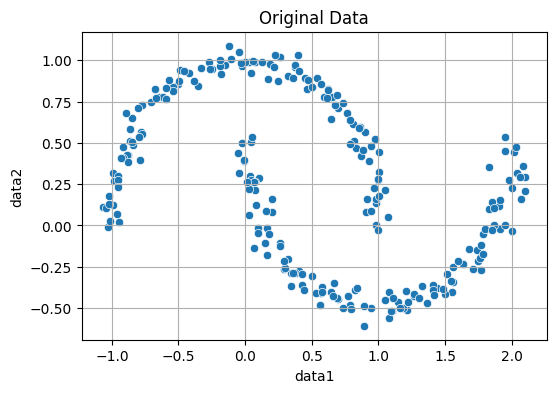

In [64]:
# 🔍 Initial Data Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x="data1", y="data2", data=df)
plt.title("Original Data")
plt.grid(True)
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler
# 🔧 Standardize the data before clustering
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [66]:
# 🧠 Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
df['Cluster'] = db.fit_predict(x_scaled)

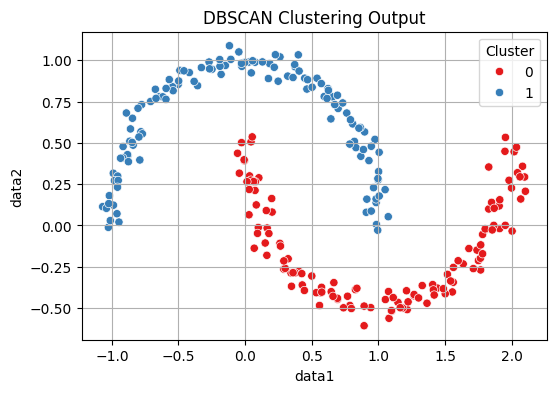

In [67]:
# 🎨 Plot DBSCAN Clustering Result
plt.figure(figsize=(6, 4))
sns.scatterplot(x="data1", y="data2", data=df, hue='Cluster', palette='Set1')
plt.title("DBSCAN Clustering Output")
plt.grid(True)
plt.show()

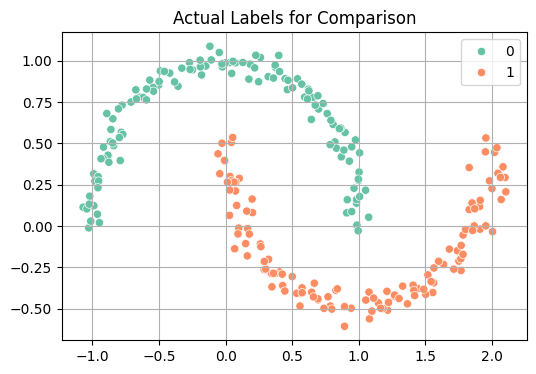

In [69]:
# ✅ Compare with actual labels (only for visual check, DBSCAN is unsupervised)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette='Set2')
plt.title("Actual Labels for Comparison")
plt.grid(True)
plt.show()

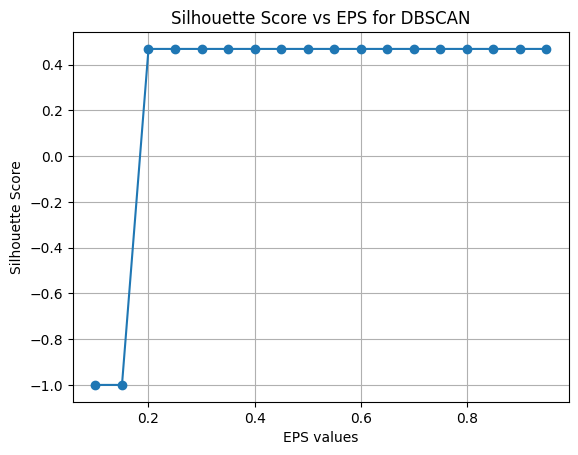

In [75]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

ss = []
eps_values = np.arange(0.1, 1.0, 0.05)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(df)
    
    # Only calculate silhouette score if there's more than 1 cluster
    if len(set(labels)) > 1 and -1 not in set(labels):
        score = silhouette_score(df, labels)
        ss.append(score)
    else:
        ss.append(-1)  # invalid clustering

# Plotting
import matplotlib.pyplot as plt

plt.plot(eps_values, ss, marker='o')
plt.xlabel("EPS values")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs EPS for DBSCAN")
plt.grid(True)
plt.show()


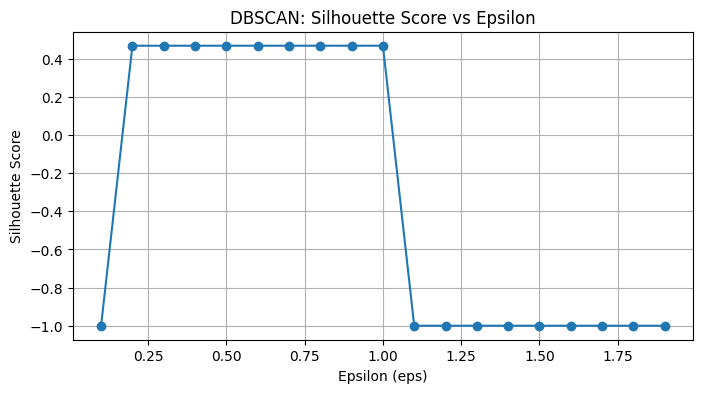

In [76]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np

ss = []
eps_values = np.arange(0.1, 2.0, 0.1)  # Try eps from 0.1 to 2.0

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(df)
    
    # Check if there is more than 1 cluster
    if len(set(labels)) > 1 and -1 not in set(labels):  # Ignore if all are noise
        score = silhouette_score(df, labels)
        ss.append(score)
    else:
        ss.append(-1)  # Invalid silhouette

# Plot the silhouette scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(eps_values, ss, marker='o')
plt.xlabel("Epsilon (eps)")
plt.ylabel("Silhouette Score")
plt.title("DBSCAN: Silhouette Score vs Epsilon")
plt.grid(True)
plt.show()
